In [1]:
#!pip install xgboost

In [2]:
#!pip install shap

## resort hotel

In [3]:
import pandas as pd
import numpy as np

ml_resort_data = pd.read_csv('data/ml_resort_data.csv',index_col=0)
ml_resort_data.head()

,is_canceled,lead_time,Direct(bool),precancel(bool),prebook(bool),change_room(bool),reserve_change(bool),parkinglot(bool),special_request(bool),customer_type(label),Contract,Group,Transient,Transient-Party
0,0,342,1.0,0,0,0,0,0.0,0.0,2,0,0,1,0
1,0,737,1.0,0,0,0,0,0.0,0.0,2,0,0,1,0
2,0,7,1.0,0,0,1,0,0.0,0.0,2,0,0,1,0
3,0,13,0.0,0,0,0,0,0.0,0.0,2,0,0,1,0
4,0,14,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0


In [4]:
label = ml_resort_data['is_canceled']
feature = ml_resort_data.drop(['is_canceled',"Contract","customer_type(label)"], axis=1)
list(feature.columns)

['lead_time',
 'Direct(bool)',
 'precancel(bool)',
 'prebook(bool)',
 'change_room(bool)',
 'reserve_change(bool)',
 'parkinglot(bool)',
 'special_request(bool)',
 'Group',
 'Transient',
 'Transient-Party']

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data_scaled = scaler.fit_transform(feature)
data_scaled = pd.DataFrame(data_scaled, columns = list(feature.columns))

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_scaled,label,test_size=0.2, stratify=label,random_state=42)

In [7]:
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [8]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

print("정확도:", accuracy_score(y_test,y_pred))
print("재현율:", recall_score(y_test,y_pred))
print("정밀도:", precision_score(y_test,y_pred))
print("f1점수:", f1_score(y_test,y_pred))
print("roc_auc점수:", roc_auc_score(y_test,y_pred))

정확도: 0.785892634207241
재현율: 0.5283273381294964
정밀도: 0.6382400869092885
f1점수: 0.5781057810578106
roc_auc점수: 0.7066109556184986


No Skill: ROC AUC=0.500
XGB: ROC AUC=0.852


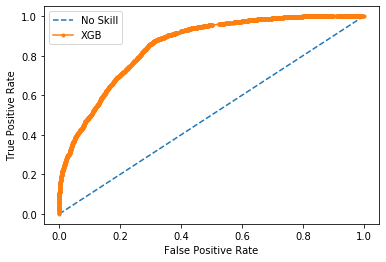

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
xgb_proba = xgb.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_proba = [0 for _ in range(len(y_test))]
 
# keep probabilities for the positive outcome only
xgb_proba = xgb_proba[:, 1]
 
# calculate scores
ns_auc = roc_auc_score(y_test, ns_proba)
xgb_auc = roc_auc_score(y_test, xgb_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

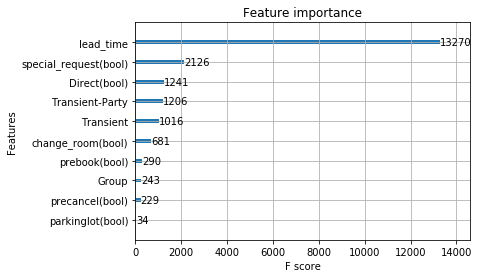

In [10]:
plot_importance(xgb)

## City hotel

In [11]:
ml_city_data = pd.read_csv('data/ml_city_data.csv',index_col=0)
ml_city_data.head()

,is_canceled,lead_time,Direct(bool),precancel(bool),prebook(bool),change_room(bool),reserve_change(bool),parkinglot(bool),special_request(bool),customer_type(label),Contract,Group,Transient,Transient-Party
0,0,6,0.0,0,0,0,0,0.0,0.0,2,0,0,1,0
1,1,88,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0
2,1,65,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0
3,1,92,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0
4,1,100,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0


In [12]:
label = ml_city_data['is_canceled']
feature = ml_city_data.drop(['is_canceled',"Contract","customer_type(label)"], axis=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(feature)
data_scaled = pd.DataFrame(data_scaled, columns = list(feature.columns))

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_scaled,label,test_size=0.2, stratify=label,random_state=42)

In [15]:
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

print("정확도:", accuracy_score(y_test,y_pred))
print("재현율:", recall_score(y_test,y_pred))
print("정밀도:", precision_score(y_test,y_pred))
print("f1점수:", f1_score(y_test,y_pred))
print("roc_auc점수:", roc_auc_score(y_test,y_pred))

정확도: 0.8007326470030948
재현율: 0.711608222490931
정밀도: 0.7905961376994123
f1점수: 0.7490255349614192
roc_auc점수: 0.7881573715253831


No Skill: ROC AUC=0.500
XGB: ROC AUC=0.876


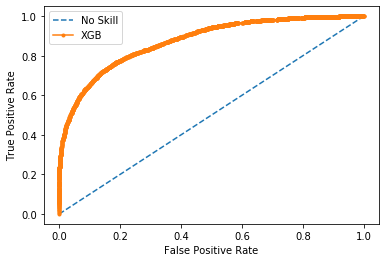

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
xgb_proba = xgb.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_proba = [0 for _ in range(len(y_test))]
 
# keep probabilities for the positive outcome only
xgb_proba = xgb_proba[:, 1]
 
# calculate scores
ns_auc = roc_auc_score(y_test, ns_proba)
xgb_auc = roc_auc_score(y_test, xgb_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

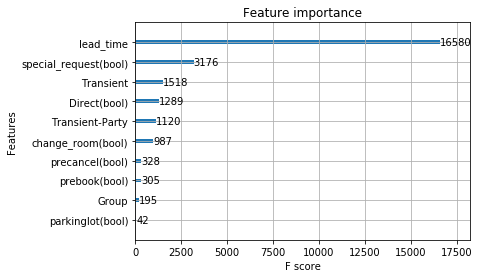

In [18]:
plot_importance(xgb)

## 기본 데이터

In [19]:
import pandas as pd
ml_data = pd.read_csv('data/hotel_bookings.csv')
ml_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### resort hotel

In [20]:
ml_hotel_basic = ml_data[ml_data["hotel"]=="Resort Hotel"]

In [21]:
look_up = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
            'June': 6, 'July': 7, 'August': 8, 'September':9, 'October': 10, 'November': 11, 'December': 12}
#see_hotel={'Resort Hotel':0,'City Hotel':1}

ml_hotel_basic['arrival_date_month'] = ml_hotel_basic['arrival_date_month'].apply(lambda x: look_up[x])
#hotel_data['hotel'] = hotel_data['hotel'].apply(lambda x: see_hotel[x])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
label = ml_hotel_basic['is_canceled']
feature = ml_hotel_basic.drop(['hotel','is_canceled'],axis = 1)

In [23]:
numerical_columns = [column for column in feature.columns if feature.dtypes[column] != 'object']

In [24]:
numerical_columns=['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature[numerical_columns],label,test_size=0.2, stratify=label,random_state=42)

In [26]:
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

print("정확도:", accuracy_score(y_test,y_pred))
print("재현율:", recall_score(y_test,y_pred))
print("정밀도:", precision_score(y_test,y_pred))
print("f1점수:", f1_score(y_test,y_pred))
print("roc_auc점수:", roc_auc_score(y_test,y_pred))

정확도: 0.8534697953070395
재현율: 0.6789568345323741
정밀도: 0.766497461928934
f1점수: 0.720076299475441
roc_auc점수: 0.7997410295675002


No Skill: ROC AUC=0.500
XGB: ROC AUC=0.901


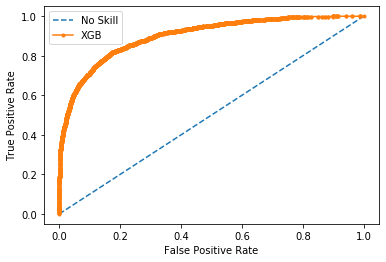

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
xgb_proba = xgb.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_proba = [0 for _ in range(len(y_test))]
 
# keep probabilities for the positive outcome only
xgb_proba = xgb_proba[:, 1]
 
# calculate scores
ns_auc = roc_auc_score(y_test, ns_proba)
xgb_auc = roc_auc_score(y_test, xgb_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

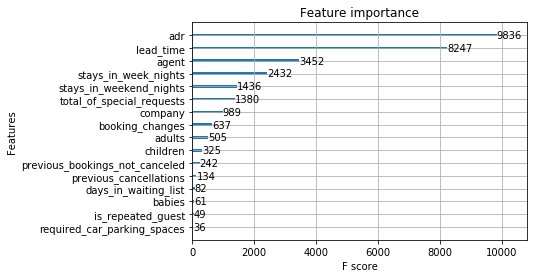

In [29]:
plot_importance(xgb)

In [30]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [31]:
X = feature[numerical_columns]

In [32]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

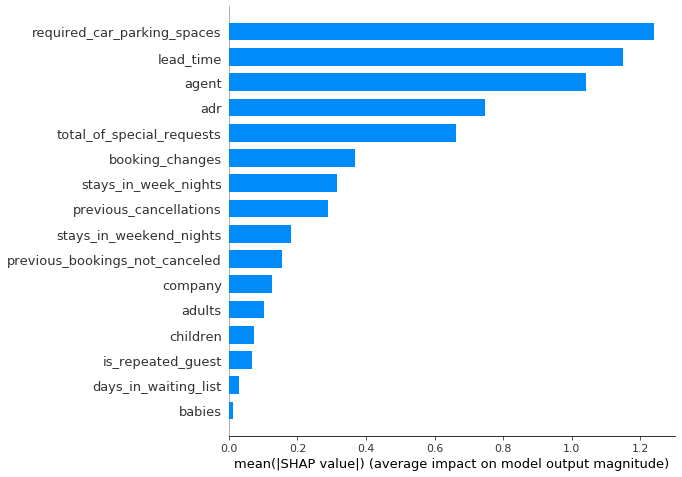

In [33]:
shap.summary_plot(shap_values, X, plot_type="bar")

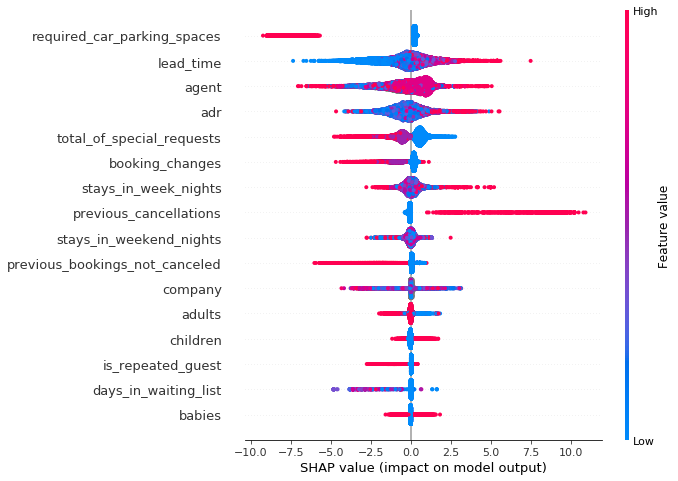

In [34]:
shap.summary_plot(shap_values, X)

### city hotel

In [35]:
ml_hotel_basic = ml_data[ml_data["hotel"]=="City Hotel"]

In [36]:
look_up = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
            'June': 6, 'July': 7, 'August': 8, 'September':9, 'October': 10, 'November': 11, 'December': 12}
#see_hotel={'Resort Hotel':0,'City Hotel':1}

ml_hotel_basic['arrival_date_month'] = ml_hotel_basic['arrival_date_month'].apply(lambda x: look_up[x])
#hotel_data['hotel'] = hotel_data['hotel'].apply(lambda x: see_hotel[x])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
label = ml_hotel_basic['is_canceled']
feature = ml_hotel_basic.drop(['hotel','is_canceled'],axis = 1)

In [38]:
numerical_columns = [column for column in feature.columns if feature.dtypes[column] != 'object']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature[numerical_columns],label,test_size=0.2, stratify=label,random_state=42)

In [40]:
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

print("정확도:", accuracy_score(y_test,y_pred))
print("재현율:", recall_score(y_test,y_pred))
print("정밀도:", precision_score(y_test,y_pred))
print("f1점수:", f1_score(y_test,y_pred))
print("roc_auc점수:", roc_auc_score(y_test,y_pred))

정확도: 0.8590066809529813
재현율: 0.7972809667673716
정밀도: 0.8550137696419893
f1점수: 0.8251387477526771
roc_auc점수: 0.8502411755749036


No Skill: ROC AUC=0.500
XGB: ROC AUC=0.929


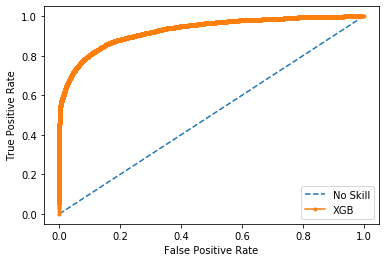

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
xgb_proba = xgb.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_proba = [0 for _ in range(len(y_test))]
 
# keep probabilities for the positive outcome only
xgb_proba = xgb_proba[:, 1]
 
# calculate scores
ns_auc = roc_auc_score(y_test, ns_proba)
xgb_auc = roc_auc_score(y_test, xgb_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

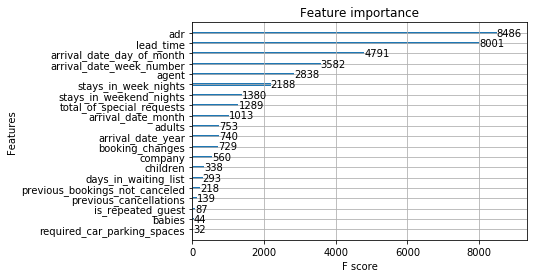

In [43]:
plot_importance(xgb)

In [44]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [45]:
X = feature[numerical_columns]

In [46]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

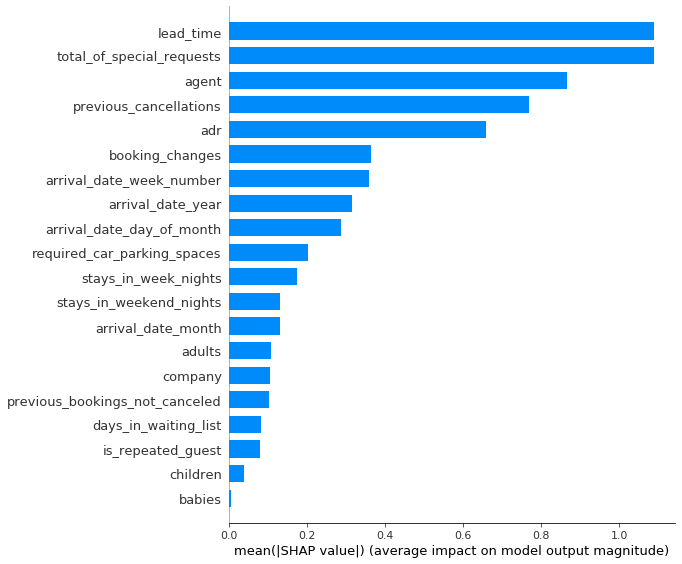

In [47]:
shap.summary_plot(shap_values, X, plot_type="bar")

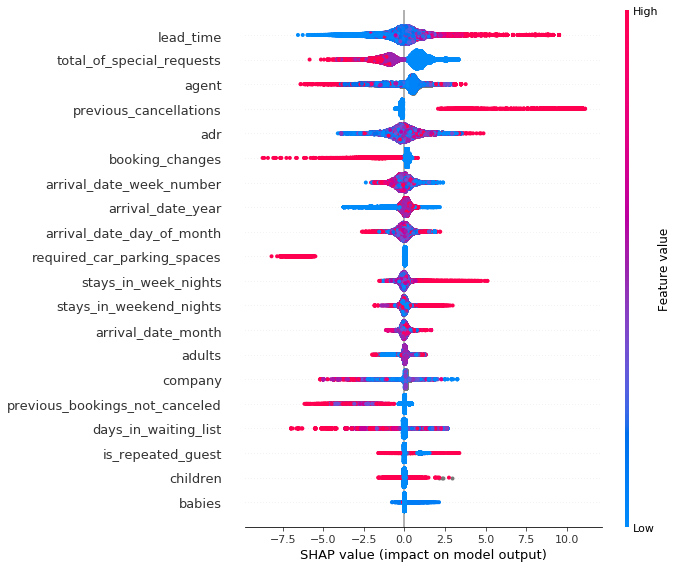

In [48]:
shap.summary_plot(shap_values, X)